In [113]:
import post_proc
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm,colors
from matplotlib.backends.backend_pdf import PdfPages
import os
prefix = "/Users/kipp/STB/output/"
save_prefix = "/Users/kipp/STB/weyl_figures/Weyl_figures/"
filename = "weyl_theta"
prefixHanke = '/Users/kipp/HankeCode'
save_prefixHanke = '/Users/kipp/HankeCode/output'
code = '/tbcode'
fnameHanke = '/out_rashbabands'
nangles = 10
def E_reshaper(prefix = prefixHanke,save_prefix = save_prefixHanke, code = code,nangels = nangles,fname = fnameHanke,sfname = '',mode = 'square'):
	rbands = np.loadtxt(prefix + code + fname)
	if mode == 'square':
		sq_shape = int(np.sqrt(rbands.shape[0]/4/nangles))
		E = rbands[:,4].reshape(nangles,4,sq_shape,sq_shape)
		K = rbands[:,1:3].reshape(10,4,sq_shape,sq_shape,2)
	elif mode == 'line':
		sq_shape = int(rbands.shape[0]/4/nangles)
		E = rbands[:,3].reshape(nangles,4,sq_shape)
		K = rbands[:,1:3].reshape(10,4,sq_shape,2)
	for j in range(nangels):
		np.save(save_prefix + code + fname + sfname + '_{:02}/'.format(j) + 'band_E',E[j])
		np.save(save_prefix + code + fname + sfname + '_{:02}/'.format(j) + 'band_k',K[0,0])
	return(E,K)

In [166]:
E,K = E_reshaper(mode = 'line')

In [71]:
textstr1

'nn hop = -1.0\nrashba so = 0.0\nloc. ex. = 0.0'

In [94]:
theta = np.linspace(0,2,20)*np.pi/2

In [147]:
textstr1 = "nn hop = {0}\nrashba so = {1}\nloc. ex. (both)  = {2}".format(-1.0,0.4,1.4)

In [ ]:
def calc_tick_pos(n_sec, pts_per_sec):
	ticks = np.zeros(n_sec+1)
	for i in range(n_sec + 1):
        	ticks[i] = (pts_per_sec - 1) * i
	return ticks

In [91]:
Hankepathpihalf = '/Users/kipp/HankeCode/output/tbcode/out_rashbabands_09'
stbpathpihalf = '/Users/kipp/STB/output/path_rel_G-K-Kprime_09'

In [85]:
Hankepathzero= '/Usestbpathpihalf = '/Users/kipp/STB/output/path_rel_G-K-Kprime_09'rs/kipp/HankeCode/output/tbcode/out_rashbabands_00'
stbpathzero = '/Users/kipp/STB/output/path_rel_G-K-Kprime_00'

In [12]:
ticks = calc_tick_pos(3,300)
label = ["$\Gamma$", "$K^{'}$", "K", "$\Gamma$"]

In [167]:
ESTBzero = np.load(stbpathzero + '/band_E.npy')
EHankezero = np.load(Hankepathzero + '/band_E.npy')[:4,1:899]

In [171]:
ESTBpihalf = np.load(stbpathpihalf + '/band_E.npy')
EHankepihalf = np.load(Hankepathpihalf + '/band_E.npy')[:4,1:899]

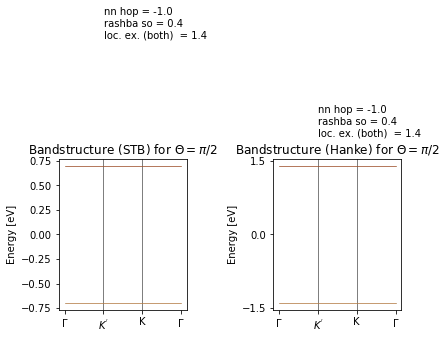

In [165]:
fig,(axis1,axis2) = plt.subplots(nrows = 1,ncols = 2,constrained_layout = True)
axis1.set_xticks(ticks)
axis1.set_xticklabels(label)
axis1.set_ylabel('Energy [eV]')
#axis1.set_yticks(np.linspace(-4.5,4.5,7))
axis1.set_title('Bandstructure (STB) for $\Theta = \pi/2$')
axis1.axvline(ticks[1],color = 'k',linewidth = '0.5')
axis1.axvline(ticks[2],color = 'k',linewidth = '0.5')
axis2.set_xticks(ticks)
axis2.set_xticklabels(label)
axis2.set_ylabel('Energy [eV]')
axis2.set_yticks(np.linspace(-4.5,4.5,7))
axis2.set_title('Bandstructure (Hanke) for $\Theta = \pi/2$')
axis2.axvline(ticks[1],color = 'k',linewidth = '0.5')
axis2.axvline(ticks[2],color = 'k',linewidth = '0.5')
axis1.text(300, 2, textstr1, rotation=0., 
         wrap = True,
         )
axis2.text(300,2, textstr1, rotation=0.,
         wrap = True,
         )
k = np.arange(0,ESTB.shape[1])

#axis1.plot(k,ESTB[3],'b',lw = 0.5,label = 'STB')
#axis1.plot(k,EHanke[3],'r',lw = 0.5, label = "Hanke")

for j in range(4):
    axis1.plot(k,ESTBpihalf[j], lw = 0.5)
    axis2.plot(k,EHankepihalf[j], lw = 0.5)
#for j in range(4):
#    axis2.plot(k,ESTB[j] - EHanke[j],lw = 0.5,label = 'band no. {}'.format(j+1))
#axis1.legend()
#axis2.legend()
with PdfPages(save_prefix + '2019-02-20_5_compare_STB_Hanke_pihalf.pdf') as pdf:
    pdf.savefig(fig)

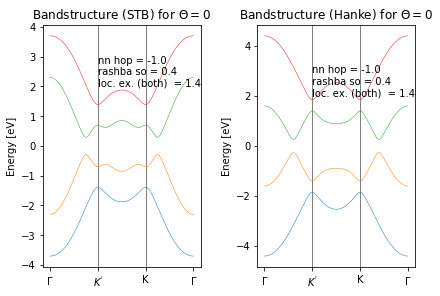

In [149]:
fig,(axis1,axis2) = plt.subplots(nrows = 1,ncols = 2,constrained_layout = True)
axis1.set_xticks(ticks)
axis1.set_xticklabels(label)
axis1.set_ylabel('Energy [eV]')
axis1.set_title('Bandstructure (STB) for $\Theta = 0$')
axis1.axvline(ticks[1],color = 'k',linewidth = '0.5')
axis1.axvline(ticks[2],color = 'k',linewidth = '0.5')
axis2.set_xticks(ticks)
axis2.set_xticklabels(label)
axis2.set_ylabel('Energy [eV]')
axis2.set_title('Bandstructure (Hanke) for $\Theta = 0$')
axis2.axvline(ticks[1],color = 'k',linewidth = '0.5')
axis2.axvline(ticks[2],color = 'k',linewidth = '0.5')
axis1.text(300, 2, textstr1, rotation=0., 
         wrap = True,
         )
axis2.text(300,2, textstr1, rotation=0.,
         wrap = True,
         )
k = np.arange(0,ESTB.shape[1])

#axis1.plot(k,ESTB[3],'b',lw = 0.5,label = 'STB')
#axis1.plot(k,EHanke[3],'r',lw = 0.5, label = "Hanke")

for j in range(4):
    axis1.plot(k,ESTBzero[j], lw = 0.5)
    axis2.plot(k,EHankezero[j], lw = 0.5)
#for j in range(4):
#    axis2.plot(k,ESTB[j] - EHanke[j],lw = 0.5,label = 'band no. {}'.format(j+1))
#axis1.legend()
#axis2.legend()
with PdfPages(save_prefix + '2019-02-20_4_compare_STB_Hanke_zero.pdf') as pdf:
    pdf.savefig(fig)

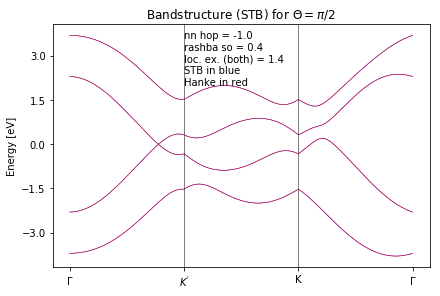

In [172]:
fig,axis1 = plt.subplots(nrows = 1,ncols = 1,constrained_layout = True)
axis1.set_xticks(ticks)
axis1.set_xticklabels(label)
axis1.set_ylabel('Energy [eV]')
axis1.set_yticks(np.linspace(-4.5,4.5,7))
axis1.set_title('Bandstructure (STB) for $\Theta = \pi/2$')
axis1.axvline(ticks[1],color = 'k',linewidth = '0.5')
axis1.axvline(ticks[2],color = 'k',linewidth = '0.5')
axis1.text(300, 2.0, textstrjoin, rotation=0., 
         wrap = True,
         )
'''
axis2.set_xticks(ticks)
axis2.set_xticklabels(label)
axis2.set_ylabel('Energy [eV]')
axis2.set_yticks(np.linspace(-4.5,4.5,7))
axis2.set_title('Bandstructure (Hanke) for $\Theta = \pi/2$')
axis2.axvline(ticks[1],color = 'k',linewidth = '0.5')
axis2.axvline(ticks[2],color = 'k',linewidth = '0.5')
'''
k = np.arange(0,ESTB.shape[1])

#axis1.plot(k,ESTB[3],'b',lw = 0.5,label = 'STB')
#axis1.plot(k,EHanke[3],'r',lw = 0.5, label = "Hanke")

for j in range(4):
    axis1.plot(k,ESTBpihalf[j], 'b',lw = 0.5)
    axis1.plot(k,EHankepihalf[j], 'r',lw = 0.5)
#for j in range(4):
#    axis2.plot(k,ESTB[j] - EHanke[j],lw = 0.5,label = 'band no. {}'.format(j+1))
#axis1.legend()
#axis2.legend()
with PdfPages(save_prefix + '2019-02-20_6_compare_STB_Hanke_pihalf_join.pdf') as pdf:
    pdf.savefig(fig)

In [153]:
textstrjoin = "nn hop = {0}\nrashba so = {1}\nloc. ex. (both) = {2}\nSTB in blue\nHanke in red".format(-1.0,0.4,1.4)

In [8]:
a = np.linspace(0,90,10)

In [9]:
a

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [10]:
b = np.linspace(0,np.pi/2,10)

In [11]:
b

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633])